# F6 -- Schaffer function

In [1]:
library(tidyverse)
library(magrittr)
library(cec2017)
source("../src/alg/cma-es-csa.R")
source("../src/alg/cma-es-expth.R")
options(repr.plot.width=20, repr.plot.height=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [2]:
eval = function(x) { cec2017::cec2017(6, x) }

In [3]:
ppmf_alg = 
  purrr::partial(cma_es_expth,
                 control = list(
                   "p_target" = 0.1,
                   "sigma" = 50,
                   "d_param" = 2
  ))
csa_alg = 
  cma_es_csa

In [83]:
csa_res = 
  csa_alg(rep(100, 10), fn = function(x) eval(x), lower = -100, upper = 100)

In [84]:
csa_res$value

[1] 778.9311

In [85]:
ppmf_res = 
  ppmf_alg(rep(100, 10), fn = function(x) eval(x), lower = -100, upper = 100)

In [86]:
ppmf_res$diagnostic %>% names()

[1] "value"   "sigma"   "eigen"   "pop"     "bestVal" "zmean"   "meanOld"

In [87]:
ppmf_res$meanOld

NULL

In [11]:
diagnostic_data = function(diag, name, alg) {
  diag[[name]] %>%
  tibble::tibble(t = 1:length(.), !!name := ., alg = alg)
}

# Sigma 

In [89]:
csa_sigma =
  diagnostic_data(csa_res$diagnostic, "sigma", "CSA")

In [90]:
ppmf_sigma = 
  diagnostic_data(ppmf_res$diagnostic, "sigma", "PPMF")

In [91]:
sigma_all = 
  dplyr::bind_rows(csa_sigma, ppmf_sigma)

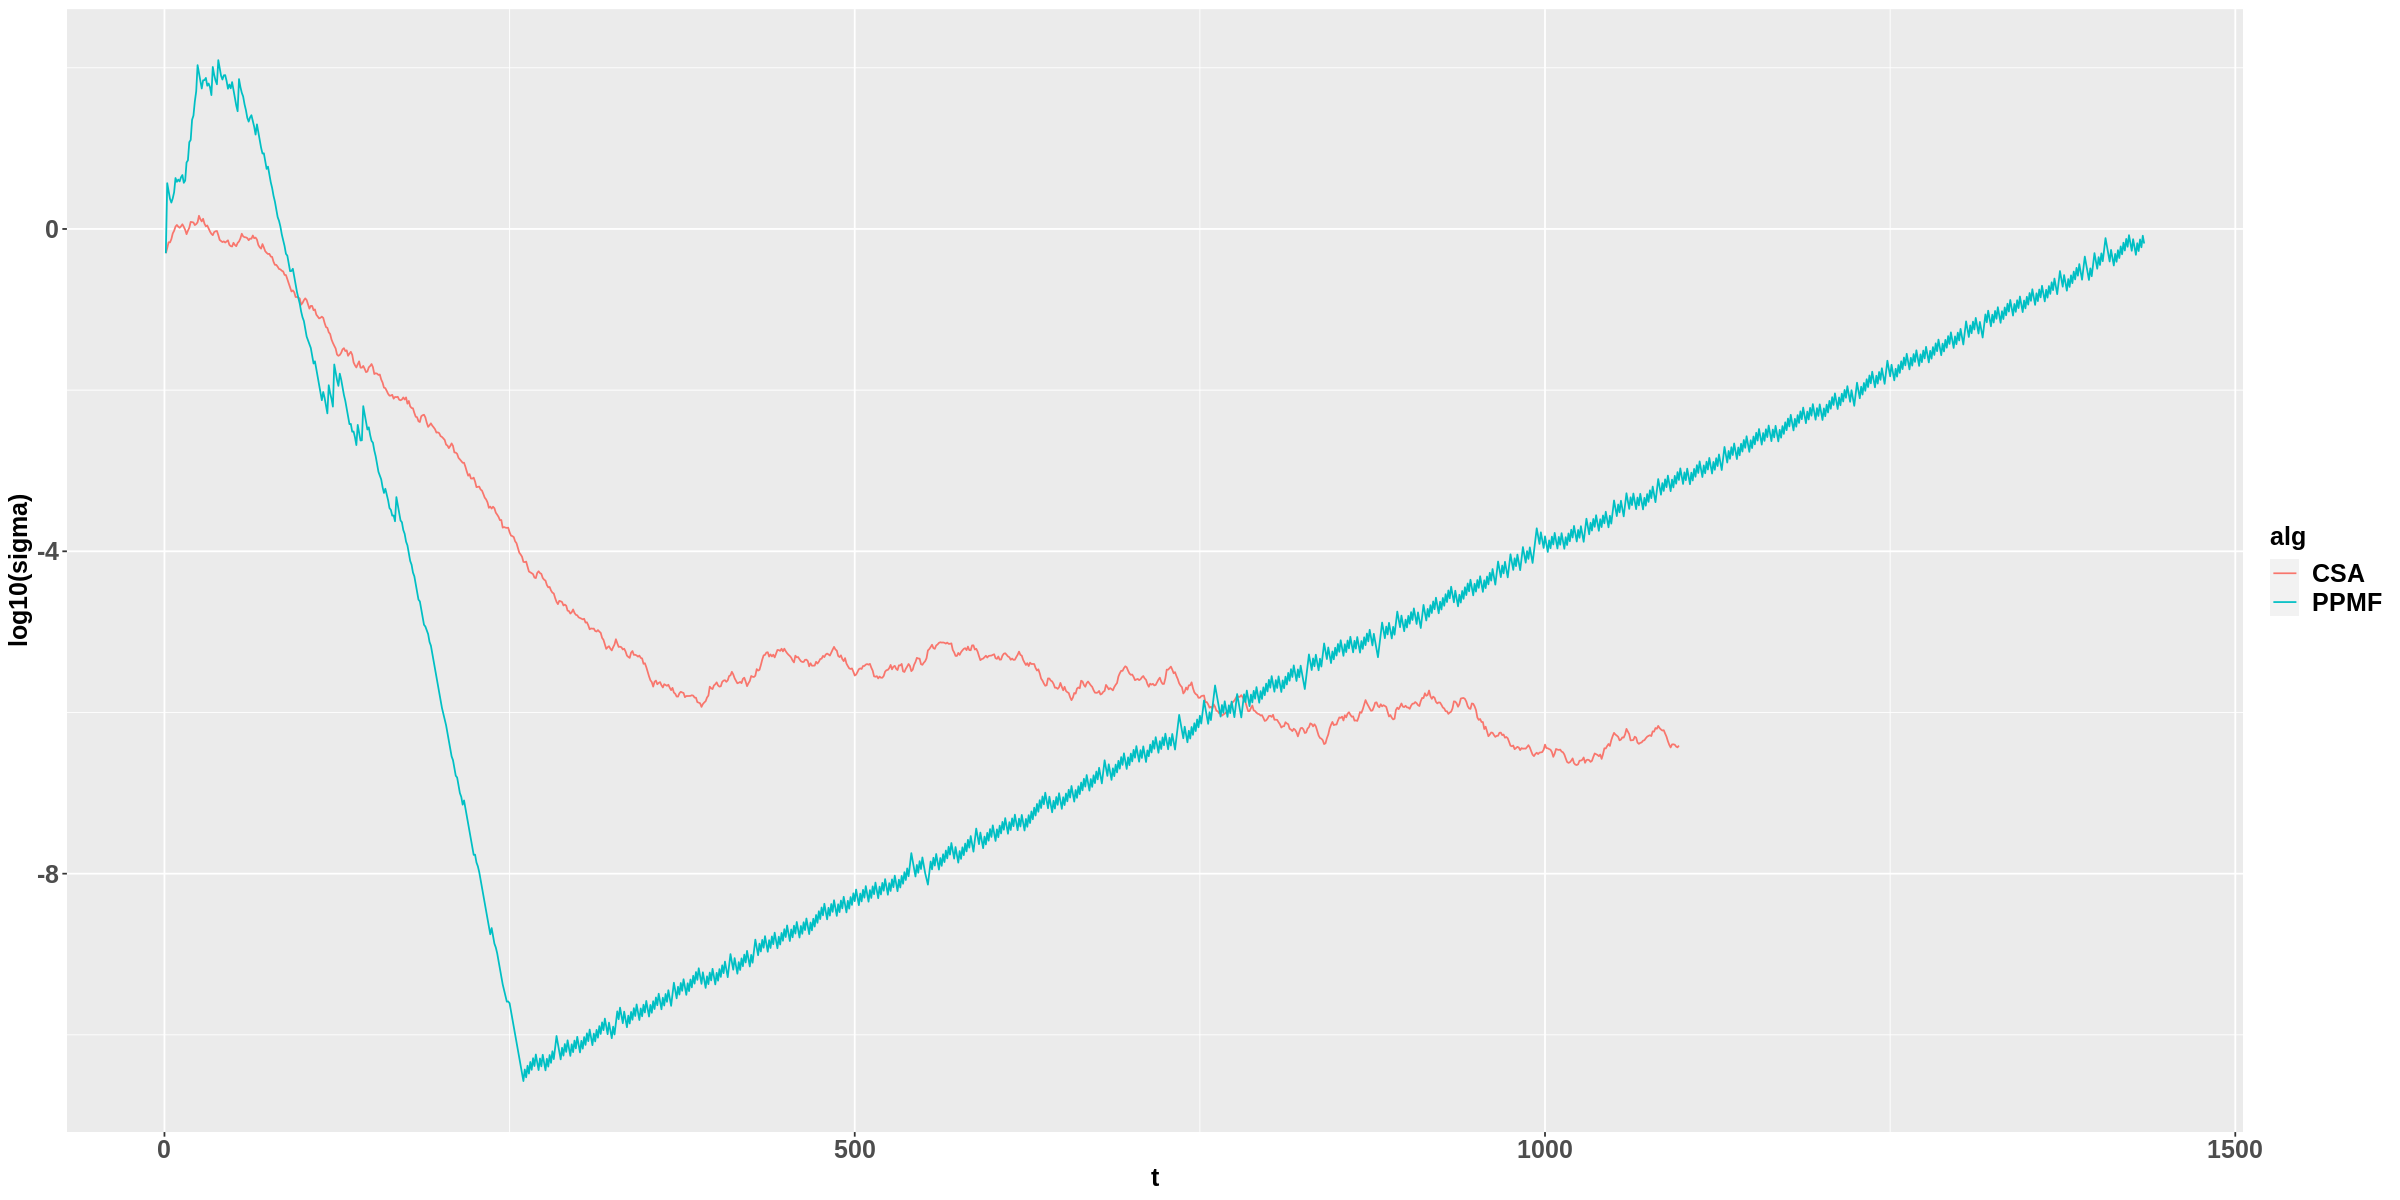

In [92]:
sigma_all %>%
  ggplot2::ggplot(aes(x = t, y = log10(sigma), col = alg)) +
  ggplot2::geom_line() +
  ggplot2::theme(
      axis.title = ggplot2::element_text(size = 15, face = "bold"),
      axis.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.title = ggplot2::element_text(size = 15, face = "bold"),
    )
  

# Conv rate

In [93]:
csa_sigma =
  diagnostic_data(csa_res$diagnostic, "bestVal", "CSA")
ppmf_sigma = 
  diagnostic_data(ppmf_res$diagnostic, "bestVal", "PPMF")
best_all = 
  dplyr::bind_rows(csa_sigma, ppmf_sigma)

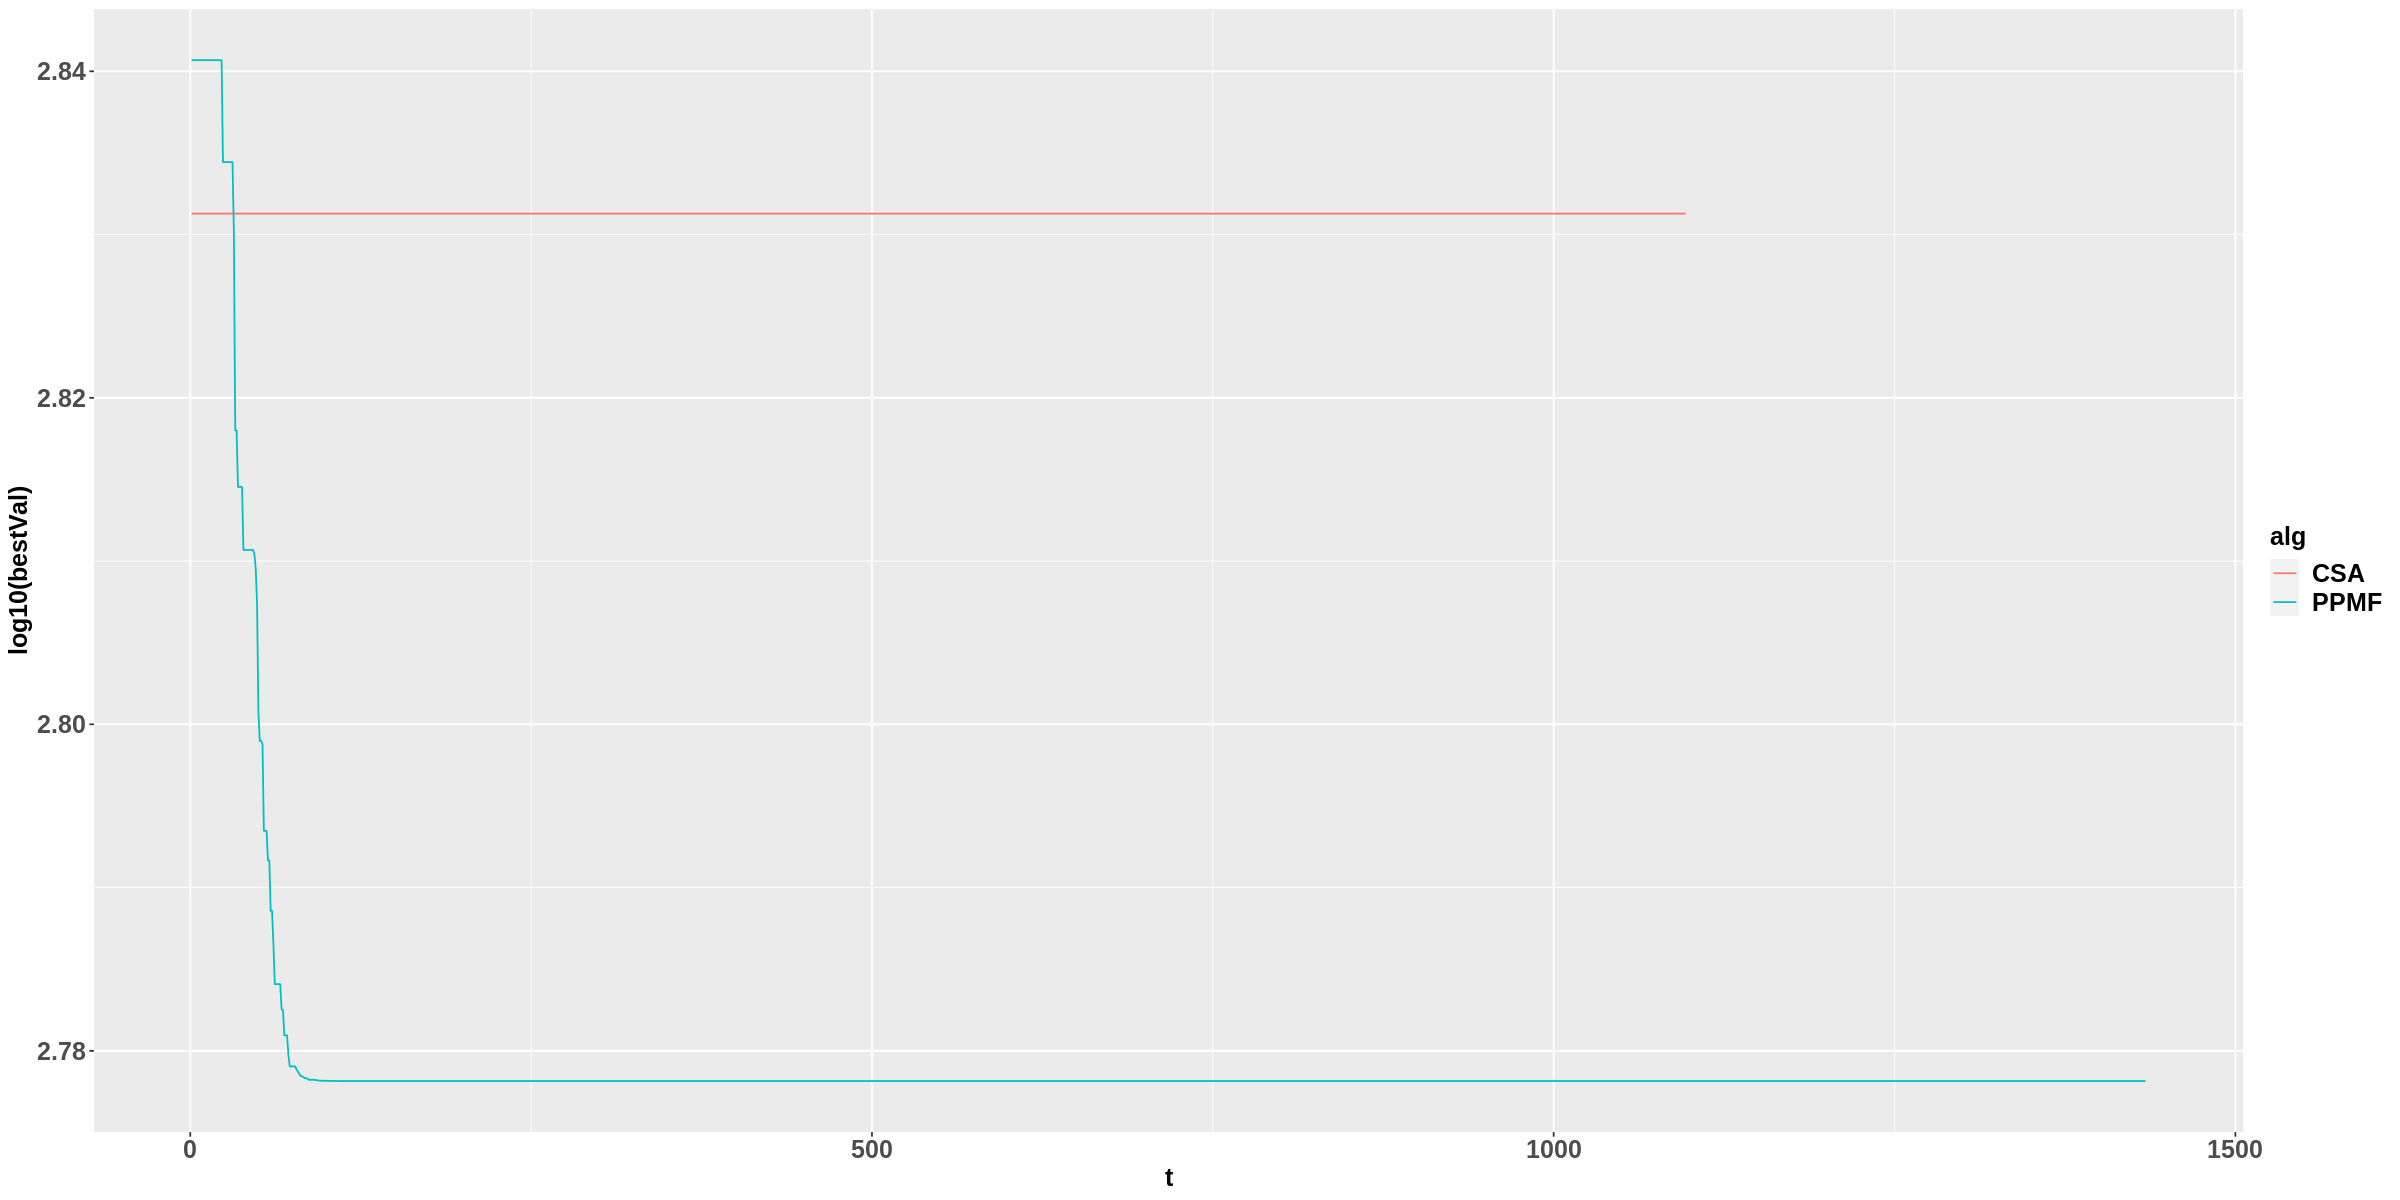

In [94]:
best_all %>%
  ggplot2::ggplot(aes(x = t, y = log10(bestVal), col = alg)) +
  ggplot2::geom_line() +
  ggplot2::theme(
      axis.title = ggplot2::element_text(size = 15, face = "bold"),
      axis.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.title = ggplot2::element_text(size = 15, face = "bold"),
    )
  

# D30

In [4]:
csa_res50 = 
  csa_alg(rep(100, 30), fn = function(x) eval(x), lower = -100, upper = 100)

In [5]:
csa_res50$diagnostic %>% names()
csa_res50$value
csa_res50$convergence
csa_res50$constr.violations

[1] "value"   "sigma"   "eigen"   "pop"     "bestVal"

[1] 600

[1] 0

[1] 6797

In [6]:
ppmf_res50 = 
  ppmf_alg(rep(100, 30), fn = function(x) eval(x), lower = -100, upper = 100)

In [7]:
ppmf_res50$diagnostic %>% names()
ppmf_res50$value
ppmf_res50$convergence
ppmf_res50$constr.violations

[1] "value"   "sigma"   "eigen"   "pop"     "bestVal"

[1] 600.0688

[1] 0

[1] 2207

In [8]:
ppmf_res50$diagnostic$pop[,,100]
                          

67.530089,67.530086,67.529642,67.529754,67.529571,67.530761,67.529907,67.529943,67.529405,67.531212,⋯,67.529518,67.528653,67.530890,67.529105,67.529657,67.529052,67.529355,67.529158,67.529499,67.530840
-24.571925,-24.571956,-24.573019,-24.572373,-24.571790,-24.573075,-24.573113,-24.571766,-24.571565,-24.572551,⋯,-24.573825,-24.571941,-24.572423,-24.573511,-24.572291,-24.572279,-24.572640,-24.572422,-24.572777,-24.573007
-34.673651,-34.674363,-34.673951,-34.674570,-34.674559,-34.674839,-34.674091,-34.674249,-34.673902,-34.674527,⋯,-34.674672,-34.674259,-34.675018,-34.674653,-34.674391,-34.674187,-34.674312,-34.676105,-34.674736,-34.674668
-44.681470,-44.681681,-44.682236,-44.682863,-44.681110,-44.681353,-44.682119,-44.682079,-44.683323,-44.683044,⋯,-44.683087,-44.682683,-44.682158,-44.681470,-44.682370,-44.681725,-44.681290,-44.681708,-44.681273,-44.682946
76.154436,76.154228,76.153613,76.154428,76.155326,76.154891,76.154741,76.154098,76.157508,76.155528,⋯,76.155184,76.153719,76.154208,76.154749,76.153993,76.152956,76.155037,76.155093,76.153662,76.155443
16.363343,16.363990,16.362558,16.363335,16.363852,16.363234,16.362393,16.362861,16.362728,16.363163,⋯,16.362271,16.363096,16.362881,16.362628,16.362345,16.362789,16.363420,16.362077,16.362713,16.362223
-21.742904,-21.742373,-21.743195,-21.743271,-21.742003,-21.742362,-21.743375,-21.742208,-21.742261,-21.741659,⋯,-21.743392,-21.743883,-21.742126,-21.744210,-21.742637,-21.743328,-21.743793,-21.741876,-21.743373,-21.743405
5.659385,5.658623,5.658590,5.658499,5.658578,5.659577,5.658370,5.659142,5.659073,5.658579,⋯,5.657480,5.660145,5.658901,5.659508,5.659136,5.659454,5.658354,5.658920,5.659648,5.659391
64.985669,64.985129,64.984390,64.985341,64.984678,64.985841,64.985892,64.984832,64.984924,64.985578,⋯,64.983950,64.984183,64.984785,64.985777,64.984898,64.985214,64.984936,64.985717,64.985022,64.985463
51.269212,51.268732,51.268117,51.267321,51.268582,51.267367,51.267302,51.267664,51.267389,51.267767,⋯,51.266187,51.267833,51.268567,51.266238,51.267023,51.266976,51.269232,51.267609,51.267328,51.269187
60.613666,60.614080,60.614324,60.613700,60.614453,60.614474,60.613906,60.613565,60.614451,60.613455,⋯,60.613436,60.615084,60.615215,60.615197,60.615176,60.614768,60.613235,60.614275,60.613783,60.614087


In [9]:
csa_res50$diagnostic$pop[,,100]

78.251886,79.825684,76.8774726,87.8127580,72.508398,79.650601,82.594913,80.252131,82.6366404,83.0834784,⋯,71.3756459,69.965549,78.7750803,81.540706,72.179450,82.5012270,78.627651,65.997793,71.914542,78.560551
-25.079754,-24.525157,-25.7541074,-25.2762833,-32.351922,-27.479720,-20.767958,-21.813694,-31.3136368,-25.7202059,⋯,-20.3356993,-18.900869,-21.2935257,-32.770555,-18.370845,-24.6524020,-25.359202,-28.486117,-29.471388,-23.034262
-37.974542,-32.670857,-35.2495161,-34.1470021,-34.906676,-35.202805,-24.126926,-36.730446,-27.9785321,-27.9270618,⋯,-32.5718854,-28.265693,-31.3589702,-29.168658,-36.152817,-32.6686369,-34.281758,-25.056070,-21.828678,-35.861634
-49.964345,-45.838909,-47.5237490,-39.4570273,-44.114515,-44.155846,-42.337803,-40.574377,-43.7553004,-48.4766090,⋯,-41.6230217,-45.994648,-36.2929373,-61.371119,-49.900395,-57.7989078,-55.429348,-39.558649,-47.484934,-38.481288
76.532911,69.365651,75.3834202,76.9553970,76.986166,72.260572,78.044185,84.994035,74.7953638,81.7289284,⋯,74.4330119,73.144292,73.3576141,75.451997,73.273154,72.5065166,79.969884,74.856663,66.233605,75.644344
14.214402,14.923669,15.6686669,13.3240385,9.461088,11.800692,20.743005,14.322564,13.4694153,17.8702433,⋯,22.2368594,19.990591,7.0911692,15.323205,12.314733,19.6780856,11.075794,21.380961,7.939973,12.764727
-19.036426,-25.111021,-26.7592554,-22.7917192,-27.026971,-27.756577,-23.169447,-21.971441,-23.3714433,-21.2594530,⋯,-25.0139258,-21.931953,-24.8991885,-16.084071,-20.218198,-29.0289561,-32.222499,-22.211421,-25.564036,-22.872251
2.859933,4.291349,-0.4077059,8.4832496,7.919897,3.811363,4.929115,5.449992,0.2217815,6.0081081,⋯,-0.2861446,7.884597,-0.5200525,13.417370,4.479951,7.7218637,12.153763,1.442510,10.329745,12.247866
68.439177,63.547134,68.0566202,55.5517313,68.410406,60.159715,51.018412,60.764259,70.1895191,63.5683356,⋯,63.2426999,60.543257,65.7295737,65.425480,61.695804,71.1368645,61.903557,64.277214,61.428768,57.923467
49.621653,54.176047,49.8442885,53.2145444,60.409790,54.706155,47.517261,49.022659,47.2799756,53.0465417,⋯,49.8042666,46.578777,56.3875420,47.552673,45.366923,43.7029853,53.097183,55.738036,53.473388,42.994249
60.006905,54.999375,64.7685157,58.3311062,59.479540,65.444985,62.179391,60.095470,58.4182103,70.1670121,⋯,50.9598562,56.553470,61.4739773,66.411859,60.666772,66.4014638,59.299138,66.286949,60.596141,72.269169


# Sigma 

In [12]:
csa_sigma50 =
  diagnostic_data(csa_res50$diagnostic, "sigma", "CSA")

In [13]:
ppmf_sigma50 = 
  diagnostic_data(ppmf_res50$diagnostic, "sigma", "PPMF")

In [14]:
sigma_all50 = 
  dplyr::bind_rows(csa_sigma50, ppmf_sigma50)

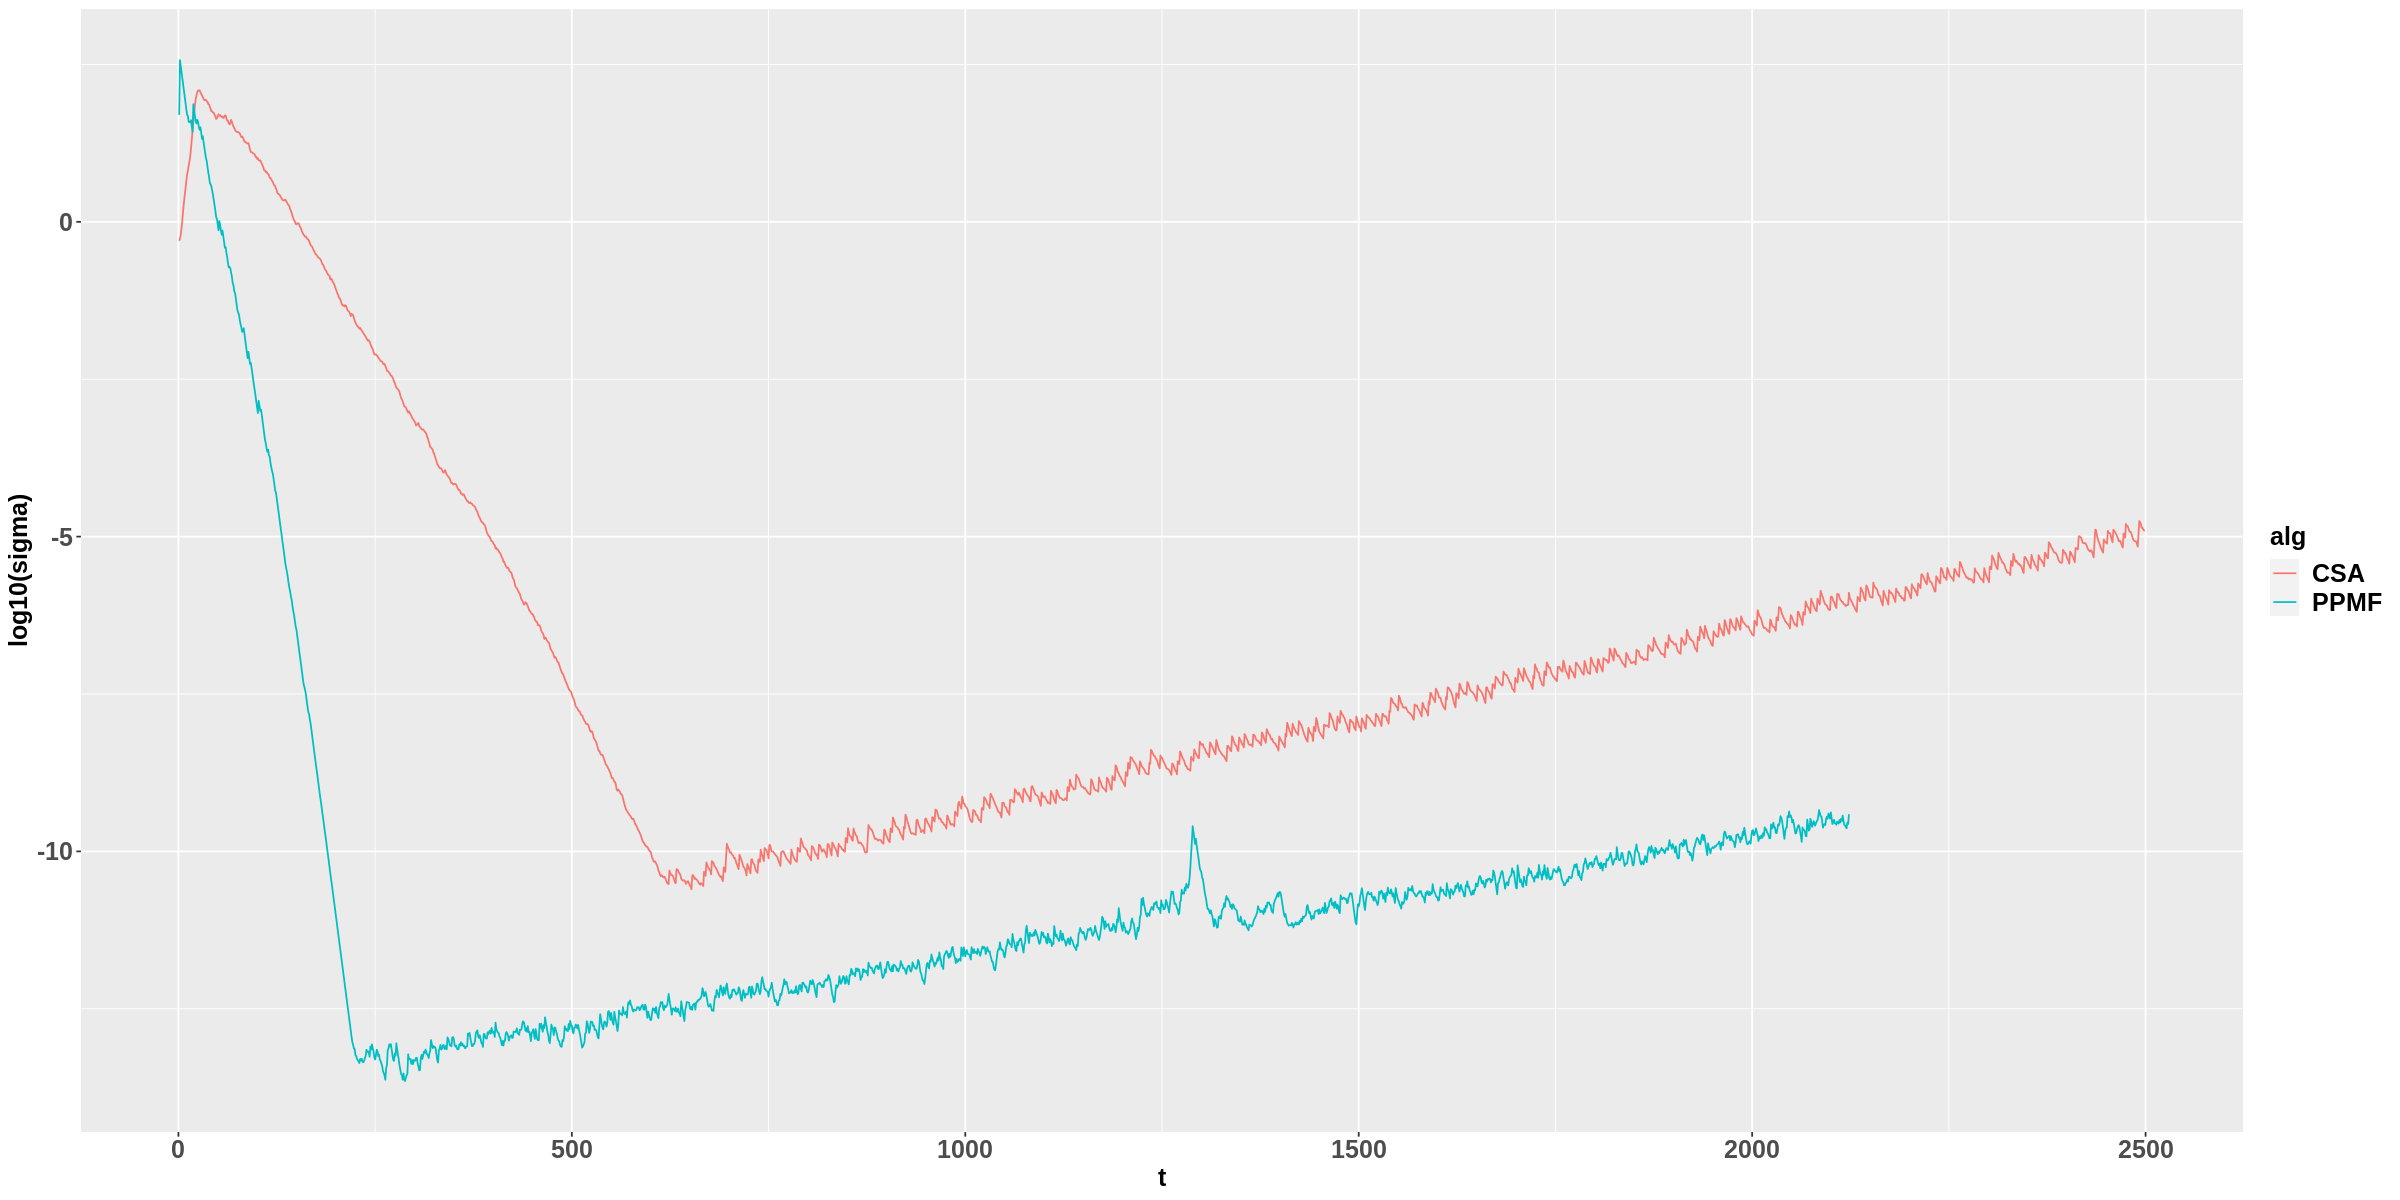

In [15]:
sigma_all50 %>%
  ggplot2::ggplot(aes(x = t, y = log10(sigma), col = alg)) +
  ggplot2::geom_line() +
  ggplot2::theme(
      axis.title = ggplot2::element_text(size = 15, face = "bold"),
      axis.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.title = ggplot2::element_text(size = 15, face = "bold"),
    )
  

# Conv rate

In [16]:
csa_sigma50 =
  diagnostic_data(csa_res50$diagnostic, "bestVal", "CSA")
ppmf_sigma50 = 
  diagnostic_data(ppmf_res50$diagnostic, "bestVal", "PPMF")
best_all50 = 
  dplyr::bind_rows(csa_sigma50, ppmf_sigma50)

Warning message:
“Removed 3422 row(s) containing missing values (geom_path).”


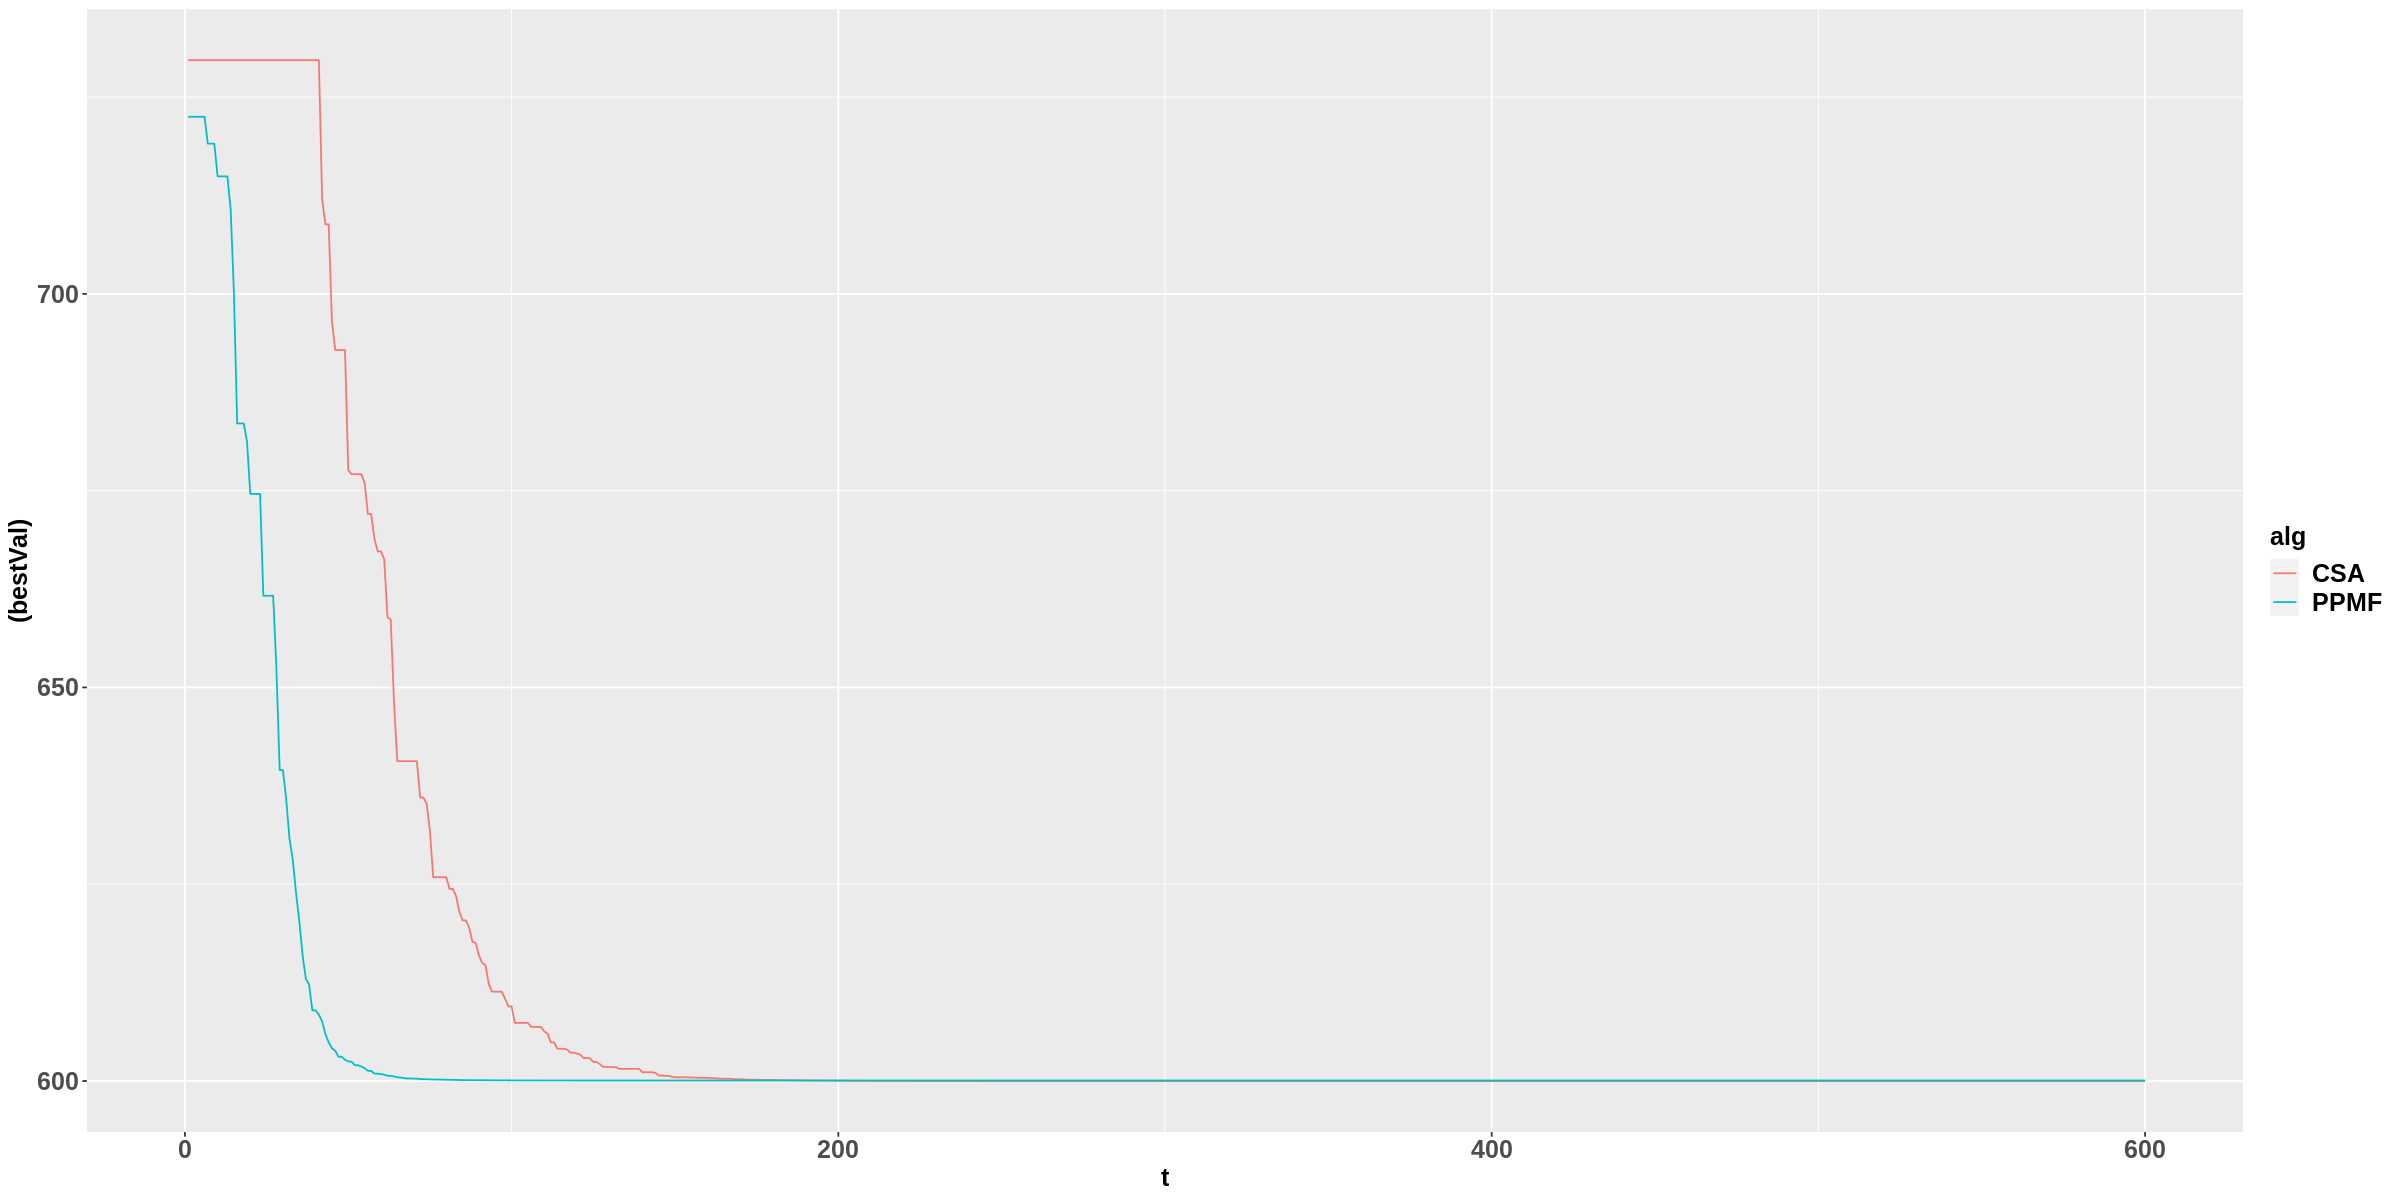

In [17]:
best_all50 %>%
  ggplot2::ggplot(aes(x = t, y = (bestVal), col = alg)) + 
  xlim(0, 600) +
  ggplot2::geom_line() +
  ggplot2::theme(
      axis.title = ggplot2::element_text(size = 15, face = "bold"),
      axis.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.title = ggplot2::element_text(size = 15, face = "bold"),
    )
  